<a href="https://colab.research.google.com/github/Interaverse/Forecasting-monthly-copper-prices/blob/main/RF_Copper_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import TimeSeriesSplit
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# Load the datasets
train_data = pd.read_excel('/content/drive/MyDrive/training_data-11_copperonly.xlsx')
test_data = pd.read_excel('/content/drive/MyDrive/testing_data-11_copperonly.xlsx')

# Assuming'Copper_Price' is the target variable
train_scaled = train_data['Price_Copper'].values.reshape(-1,1)
test_scaled = test_data['Price_Copper'].values.reshape(-1,1)

Mounted at /content/drive


In [ ]:
#This function is optional, but it improves performance
def create_dataset(dataset, time_step=10):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i + time_step), 0]  # Extracting time_step consecutive elements
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])  # Corresponding future value as label
    return np.array(dataX), np.array(dataY)

# Initilize time step
time_step = 10
X_train, y_train = create_dataset(train_scaled, time_step)
X_test, y_test = create_dataset(test_scaled, time_step)

print("X_train Shape:", X_train.shape)  # Expected: (n_samples, time_step)
print("X_test Shape:", X_test.shape)    # Expected: (n_samples, time_step)

X_train Shape: (308, 10)
X_test Shape: (69, 10)


In [ ]:
# Build the Random Forest Regressor Model
model = RandomForestRegressor(n_estimators=100, max_depth=10, min_samples_split=5, random_state=42)

# Train the Random Forest Regressor Model
model.fit(X_train, y_train.ravel())

RandomForestRegressor(max_depth=10, min_samples_split=5, random_state=42)

In [ ]:
# Make Predictions on Taining and Testing sets
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

# Calculate and print RMSE performance metrics
train_rmse = np.sqrt(mean_squared_error(y_train, pred_train))
test_rmse = np.sqrt(mean_squared_error(y_test, pred_test))
print(f'Train RMSE: {train_rmse:.2f} ')
print(f'Test RMSE: {test_rmse:.2f} ')
print('----------------')

# Calculate and print MAE performance metrics
train_mae = mean_absolute_error(y_train, pred_train)
test_mae = mean_absolute_error(y_test, pred_test)
print(f'Train MAE: {train_mae:.2f} ')
print(f'Test MAE: {test_mae:.2f} ')
print('----------------')

# Calculate and print MSE performance metrics
train_mse = mean_squared_error(y_train, pred_train)
test_mse = mean_squared_error(y_test, pred_test)
print(f'Train MSE: {train_mse:.2f} ')
print(f'Test MSE: {test_mse:.2f} ')
print('----------------')

# Calculate and print r2 performance metrics
train_r2 = r2_score(y_train, pred_train)
test_r2 = r2_score(y_test, pred_test)
print(f'Train R2: {train_r2:.2f} ')
print(f'Test R2: {test_r2:.2f}' )


Train RMSE: 0.04 
Test RMSE: 0.13 
----------------
Train MAE: 0.03 
Test MAE: 0.10 
----------------
Train MSE: 0.00 
Test MSE: 0.02 
----------------
Train R2: 1.00 
Test R2: 0.87


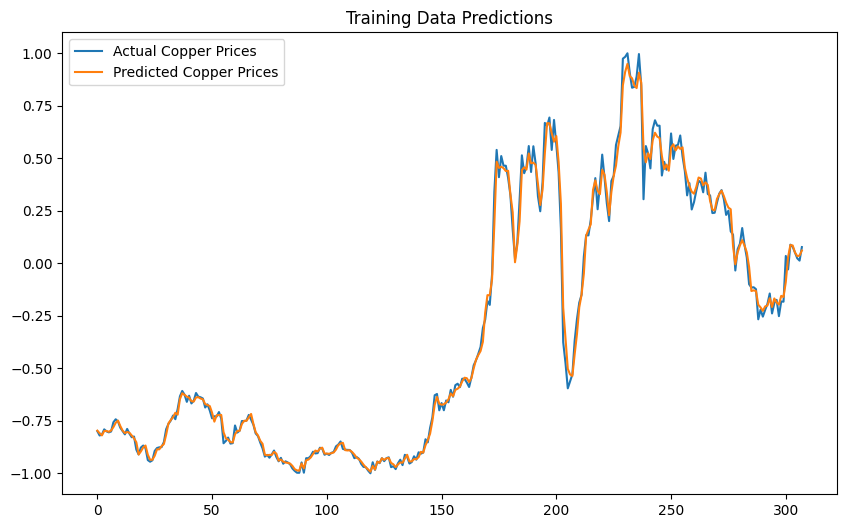

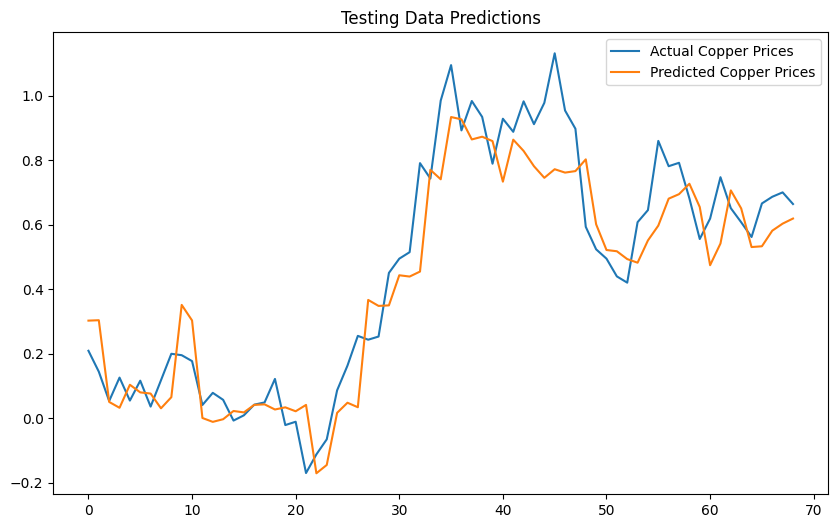

In [ ]:
# Visualize predictions for training set
plt.figure(figsize=(10, 6))
plt.plot(y_train, label = 'Actual Copper Prices')
plt.plot(pred_train, label = 'Predicted Copper Prices')
plt.title('Training Data Predictions')
plt.legend()
plt.show()

# Visualize predictions for testing set
plt.figure(figsize=(10, 6))
plt.plot(y_test, label = 'Actual Copper Prices')
plt.plot(pred_test, label = 'Predicted Copper Prices')
plt.title('Testing Data Predictions')
plt.legend()
plt.show()

In [ ]:
!pip install deap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 1.1 MB/s eta 0:00:00


In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from deap import base, creator, tools, algorithms
import random

def evaluate_individual(individual):
    # Unpack individual's parameters
    n_estimators, max_depth, min_samples_split = individual

    # Create the Random Forest Regressor model with the selected parameters
    model = RandomForestRegressor(n_estimators=n_estimators,
                                   max_depth=max_depth,
                                   min_samples_split=min_samples_split,
                                   random_state=42)

    model.fit(X_train, y_train.ravel())  # Ensure X_train and y_train are defined
    predictions = model.predict(X_test)  # Ensure X_test and y_test are defined
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)  # Calculate RMSE from MSE
    return (mse,rmse)

# Genetic operators
def mutate_individual(individual):
    if random.random() < 0.2:
        individual[0] = random.randint(100, 300)  # Vary number of estimators
    if random.random() < 0.2:
        individual[1] = random.randint(1, 20)  # Vary max depth
    if random.random() < 0.2:
        individual[2] = random.randint(2, 20)  # Vary min samples split
    return individual,

def crossover_individual(ind1, ind2):
    if random.random() < 0.5:
        ind1[0], ind2[0] = ind2[0], ind1[0]  # Crossover for number of estimators
    if random.random() < 0.5:
        ind1[1], ind2[1] = ind2[1], ind1[1]  # Crossover for max depth
    if random.random() < 0.5:
        ind1[2], ind2[2] = ind2[2], ind1[2]  # Crossover for min samples split
    return ind1, ind2

# DEAP setup
creator.create("FitnessMin", base.Fitness, weights=(-1.0, -1.0))
creator.create("Individual", list, fitness=creator.FitnessMin)

toolbox = base.Toolbox()
toolbox.register("n_estimators", random.randint, 100, 300)
toolbox.register("max_depth", random.randint, 1, 20)
toolbox.register("min_samples_split", random.randint, 2, 20)
toolbox.register("individual", tools.initCycle, creator.Individual,
                 (toolbox.n_estimators, toolbox.max_depth, toolbox.min_samples_split),
                 n=1)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("evaluate", evaluate_individual)
toolbox.register("mate", crossover_individual)
toolbox.register("mutate", mutate_individual)
toolbox.register("select", tools.selTournament, tournsize=3)

population = toolbox.population(n=50)

def print_best_of_generation(gen, pop):
    best_individual = min(pop, key=lambda ind: ind.fitness.values[0])
    print(f"Generation: {gen}")
    print(f"  Best Parameters: {best_individual}, MSE: {best_individual.fitness.values[0]}, RMSE: {best_individual.fitness.values[1]}")

# Custom loop for the genetic algorithm to print best individual per generation
ngen = 10
for gen in range(ngen):
    offspring = algorithms.varAnd(population, toolbox, cxpb=0.5, mutpb=0.2)
    fits = toolbox.map(toolbox.evaluate, offspring)
    for fit, ind in zip(fits, offspring):
        ind.fitness.values = fit
    population = toolbox.select(offspring, k=len(population))
    print_best_of_generation(gen, population)

best_individual = tools.selBest(population, k=1)[0]
print("Best individual found:")
print(f"  Parameters: {best_individual}")
print(f"  MSE: {best_individual.fitness.values[0]}, RMSE: {best_individual.fitness.values[1]}")

Generation: 0
  Best Parameters: [131, 18, 13], MSE: 0.015234034623744343, RMSE: 0.1234262315058851
Generation: 1
  Best Parameters: [131, 8, 13], MSE: 0.015228189296231048, RMSE: 0.12340254979631113
Generation: 2
  Best Parameters: [131, 5, 14], MSE: 0.015220131184078304, RMSE: 0.12336989577720452
Generation: 3
  Best Parameters: [200, 12, 14], MSE: 0.0151945366778102, RMSE: 0.12326612137083814
Generation: 4
  Best Parameters: [200, 12, 14], MSE: 0.0151945366778102, RMSE: 0.12326612137083814
Generation: 5
  Best Parameters: [200, 12, 14], MSE: 0.0151945366778102, RMSE: 0.12326612137083814
Generation: 6
  Best Parameters: [118, 5, 14], MSE: 0.015075358116837016, RMSE: 0.1227817499339255
Generation: 7
  Best Parameters: [118, 5, 14], MSE: 0.015075358116837016, RMSE: 0.1227817499339255
Generation: 8
  Best Parameters: [118, 5, 13], MSE: 0.015056734864785851, RMSE: 0.1227058876533064
Generation: 9
  Best Parameters: [118, 5, 13], MSE: 0.015056734864785851, RMSE: 0.1227058876533064
Best in

In [ ]:
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit

# Define TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=10)

# Initialize the Random Forest Regressor model
model_opt2 = RandomForestRegressor()

# Define the grid of hyperparameters to search
param_grid = {
    'n_estimators': [117, 118, 119], #DEAP suggested 118, exploring and testing close values
    'max_depth': [4, 5, 6],  #DEAP suggested 5, exploring and testing close values
    'min_samples_split': [12, 13, 14]   #DEAP suggested 13, exploring and testing close values
}

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(estimator=model_opt2, param_grid=param_grid, cv=tscv, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Print the best parameters and the corresponding RMSE score for the best model
best_params = grid_search.best_params_
best_cv_score = np.sqrt(-grid_search.best_score_)
print(f"Best parameters: {best_params}")
print(f"Best cross-validation RMSE: {best_cv_score:.4f}")

# Get the best model
best_model = grid_search.best_estimator_

for train_index, test_index in tscv.split(X_train):
    X_train_fold, X_test_fold = X_train[train_index], X_train[test_index]
    y_train_fold, y_test_fold = y_train[train_index], y_train[test_index]

    # Directly predict using the best model
    predictions = best_model.predict(X_test_fold)
    rmse = np.sqrt(mean_squared_error(y_test_fold, predictions))
    mae = mean_absolute_error(y_test_fold, predictions)
    r2 = r2_score(y_test_fold, predictions)
    print(f'Fold RMSE: {rmse}, Fold MAE: {mae}, Fold R2: {r2}')

Best parameters: {'max_depth': 5, 'min_samples_split': 12, 'n_estimators': 118}
Best cross-validation RMSE: 0.3007
Fold RMSE: 0.026896444079112927, Fold MAE: 0.020696044343039066, Fold R2: 0.8613963304027196
Fold RMSE: 0.01975879198815398, Fold MAE: 0.015055622006882671, Fold R2: 0.9258437350557808
Fold RMSE: 0.018576505430946168, Fold MAE: 0.015032367877283018, Fold R2: 0.8006963614373012
Fold RMSE: 0.018708144373373002, Fold MAE: 0.01610452512626546, Fold R2: 0.3301576698035501
Fold RMSE: 0.029090502364299803, Fold MAE: 0.021909305509203485, Fold R2: 0.9554007600424523
Fold RMSE: 0.0932498850866847, Fold MAE: 0.07520351824761673, Fold R2: 0.879955422826106
Fold RMSE: 0.09889259303101709, Fold MAE: 0.08035325339569897, Fold R2: 0.9384674436488604
Fold RMSE: 0.1255858935958386, Fold MAE: 0.09548132026493314, Fold R2: 0.6284102468899768
Fold RMSE: 0.06521163122714772, Fold MAE: 0.052144871163511006, Fold R2: 0.7878906176054995
Fold RMSE: 0.0607903061072569, Fold MAE: 0.04563210741305568

In [ ]:
# Evaluate the best model on the test set
y_predgrid = best_model.predict(X_test)
test_rmse = np.sqrt(mean_squared_error(y_test, y_predgrid))
test_mse = mean_squared_error(y_test, y_predgrid)
test_mae = mean_absolute_error(y_test, y_predgrid)
test_r2 = r2_score(y_test, y_predgrid)

# Printing Model Evaluation
print("Test RMSE Score:", test_rmse)
print("Test MSE Score:", test_mse)
print("Test MAE Score:", test_mae)
print("Test R^2 Score:", test_r2)

Test RMSE Score: 0.1264567912299464
Test MSE Score: 0.01599132004817425
Test MAE Score: 0.10069503415015024
Test R^2 Score: 0.8775431984583365


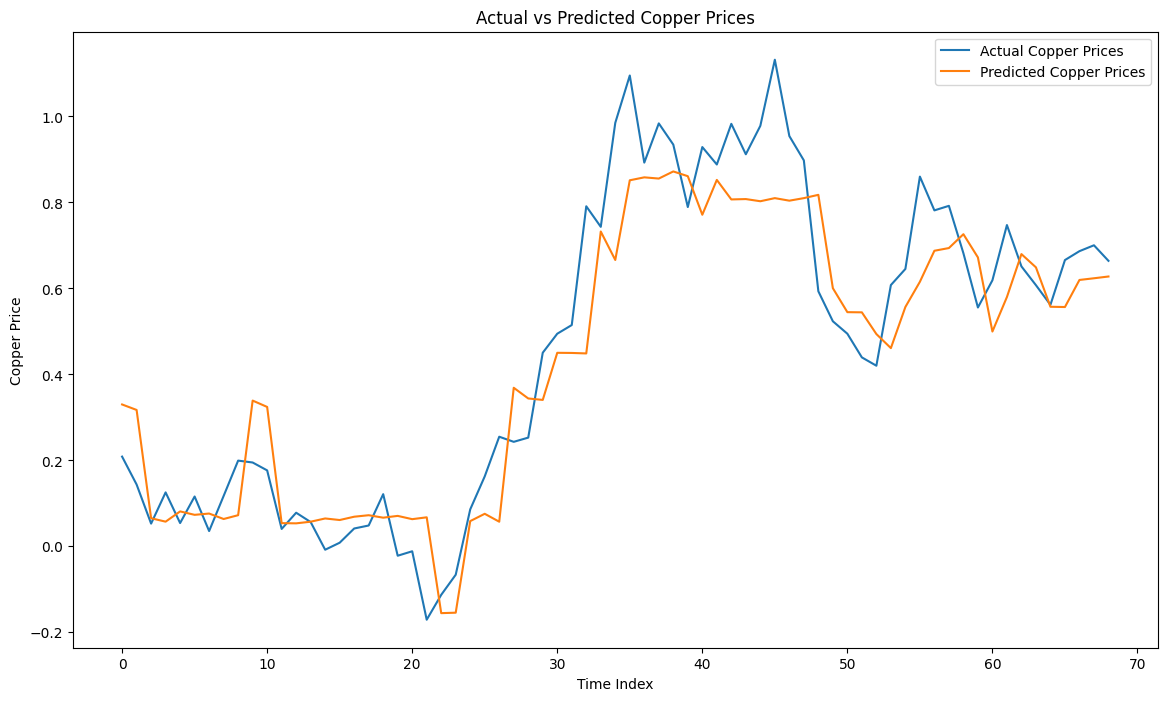

In [ ]:
# Visualize predictions
plt.figure(figsize=(14, 8))
plt.plot(y_test, label = 'Actual Copper Prices')
plt.plot(y_predgrid, label = 'Predicted Copper Prices')
plt.title('Actual vs Predicted Copper Prices')
plt.xlabel('Time Index')
plt.ylabel('Copper Price')
plt.legend()
plt.show()

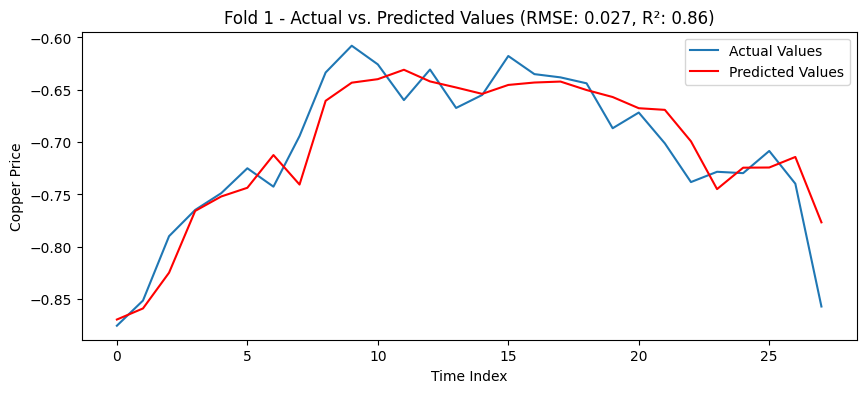

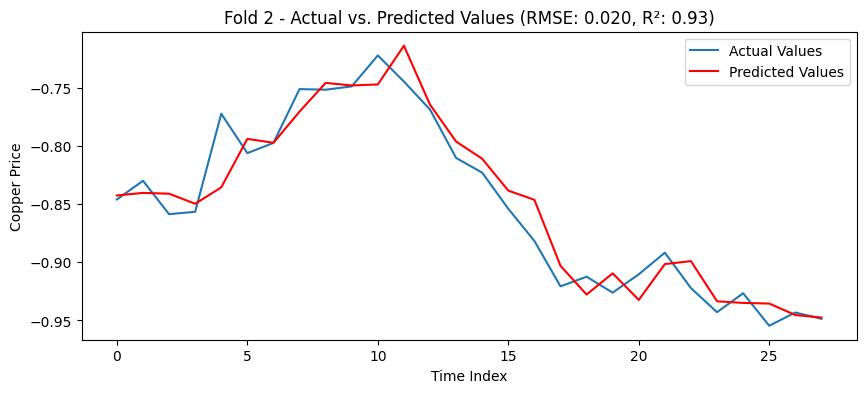

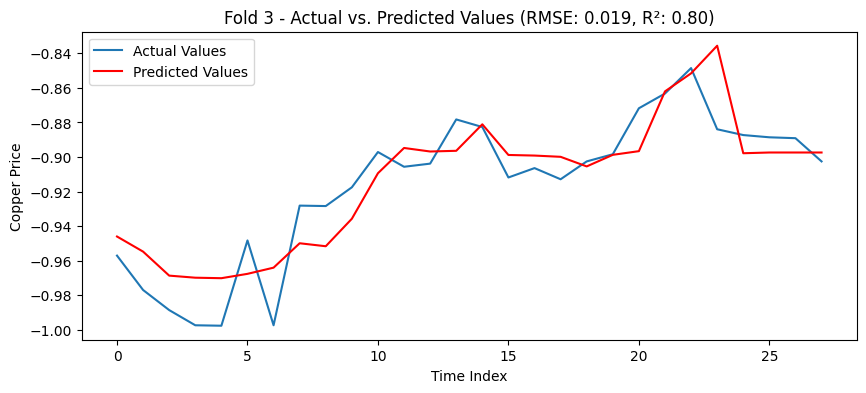

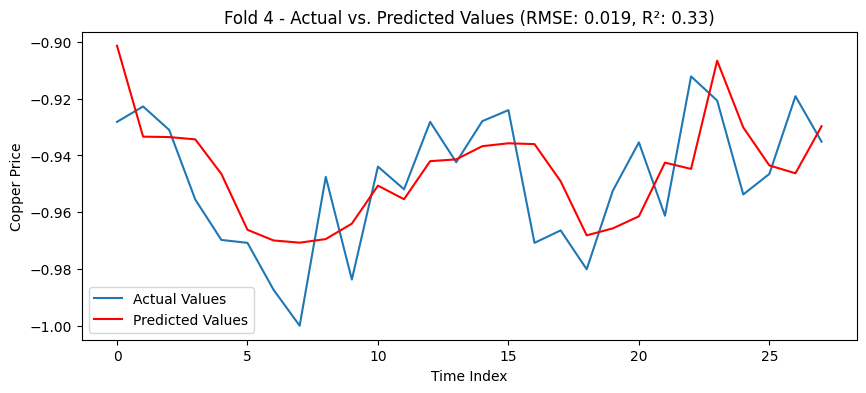

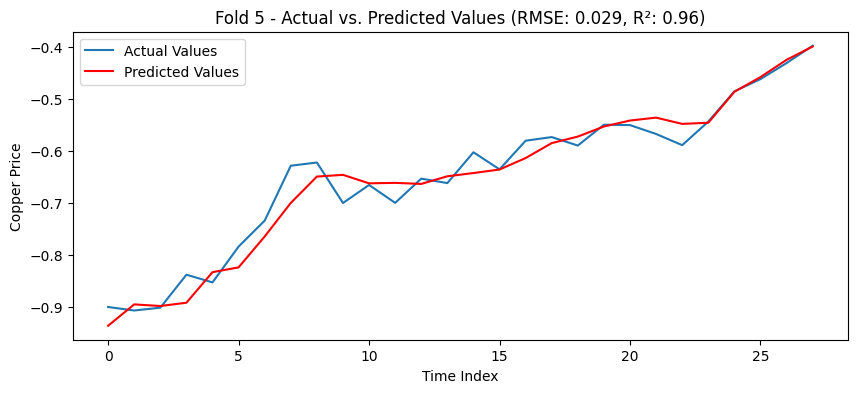

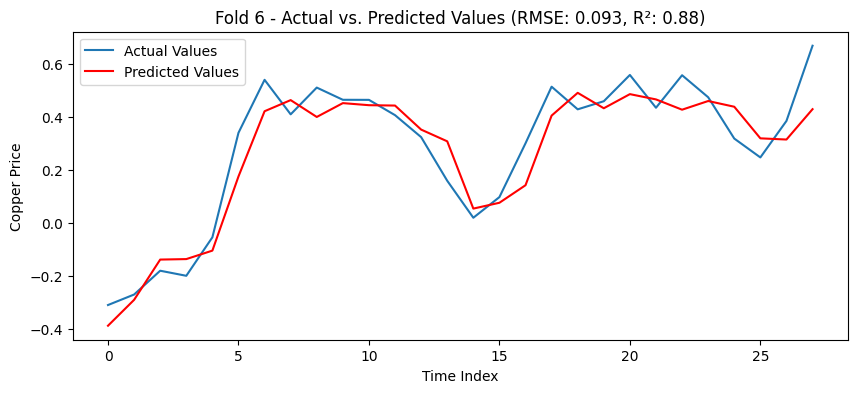

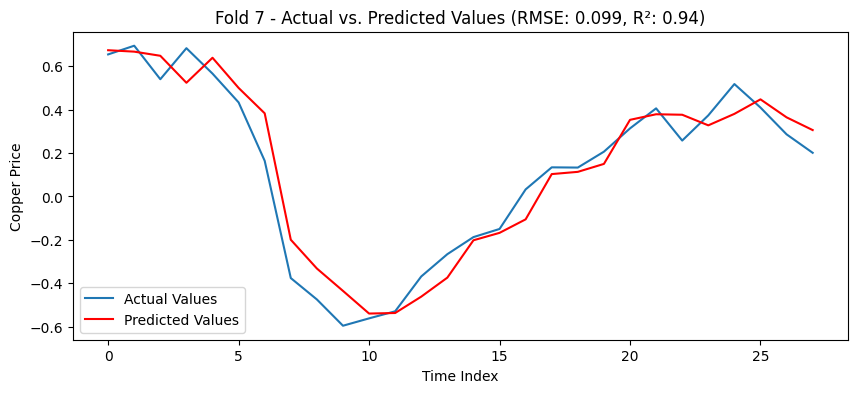

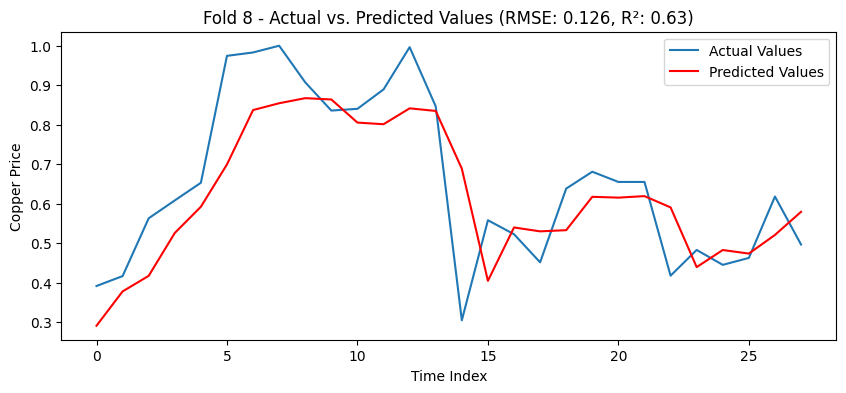

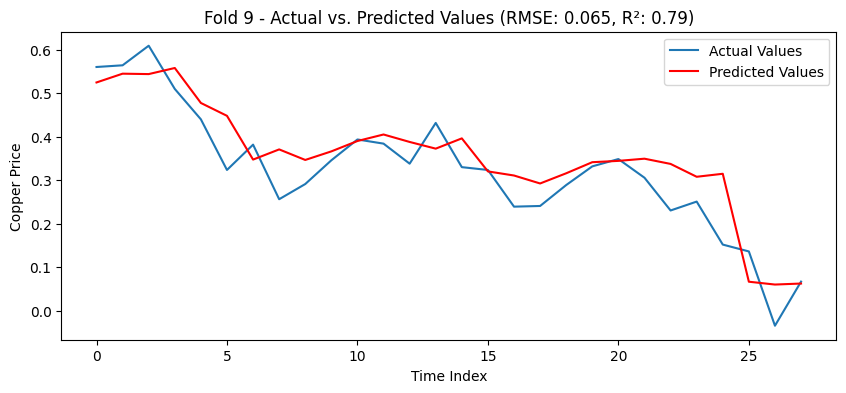

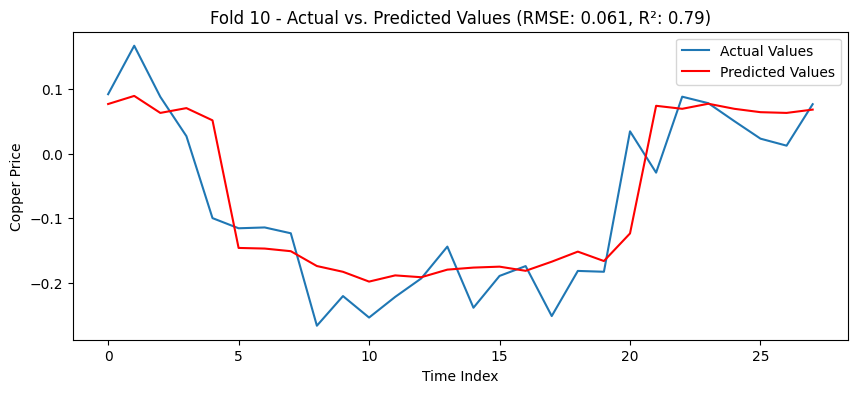

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

# Loop through each fold in the Time Series Split
for i, (train_index, test_index) in enumerate(tscv.split(X_train)):
    X_train_fold, X_test_fold = X_train[train_index], X_train[test_index]
    y_train_fold, y_test_fold = y_train[train_index], y_train[test_index]

    # Predict using the best model
    fold_predictions = best_model.predict(X_test_fold)
    fold_rmse = np.sqrt(mean_squared_error(y_test_fold, fold_predictions))
    fold_r2 = r2_score(y_test_fold, fold_predictions)  # Calculate R^2 score

    # Plotting the results for the current fold
    plt.figure(figsize=(10, 4))
    plt.plot(y_test_fold, label='Actual Values')
    plt.plot(fold_predictions, 'r', label='Predicted Values')
    plt.title(f'Fold {i+1} - Actual vs. Predicted Values (RMSE: {fold_rmse:.3f}, R²: {fold_r2:.2f})')
    plt.xlabel('Time Index')
    plt.ylabel('Copper Price')
    plt.legend()
    plt.show()


In [ ]:
from sklearn.model_selection import cross_val_score, TimeSeriesSplit

# Define TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=10)

# Perform cross-validation on the test set using MSE
cross_val_scores = cross_val_score(best_model, X_test, y_test, cv=tscv, scoring='neg_mean_squared_error')

# Calculate RMSE from MSE scores
rmse_cross_val_scores = np.sqrt(-cross_val_scores)

# Format RMSE values to display up to 16 decimal places
rmse_scores_formatted = [format(score, '.16f') for score in rmse_cross_val_scores]

# Print results
print("RMSE Scores:")
for i, score in enumerate(rmse_scores_formatted):
    print(f'Fold {i+1}: {score}')

# Calculate mean of RMSE scores
rmse_mean = np.mean(rmse_cross_val_scores)

# Format the mean RMSE value to display up to 16 decimal places
rmse_mean_formatted = format(rmse_mean, '.16f')
print(f'Mean CV RMSE: {rmse_mean_formatted}')

RMSE Scores:
Fold 1: 0.0771753439592586
Fold 2: 0.0861112419128685
Fold 3: 0.1525873105075132
Fold 4: 0.4263504271038528
Fold 5: 0.6259781997090506
Fold 6: 0.0999611721480268
Fold 7: 0.2594365608465220
Fold 8: 0.1431867449744552
Fold 9: 0.1921200294714165
Fold 10: 0.0593098788870706
Mean CV RMSE: 0.2122216909520035
